In [28]:
# -*- coding: UTF-8 -*-

In [29]:
%load_ext rqalpha

The rqalpha extension is already loaded. To reload it, use:
  %reload_ext rqalpha


2016-03-01 INFO init
[2018-02-13 11:51:19.449165] WARN: system_log: Missing Chinese fonts. Fallback to English.


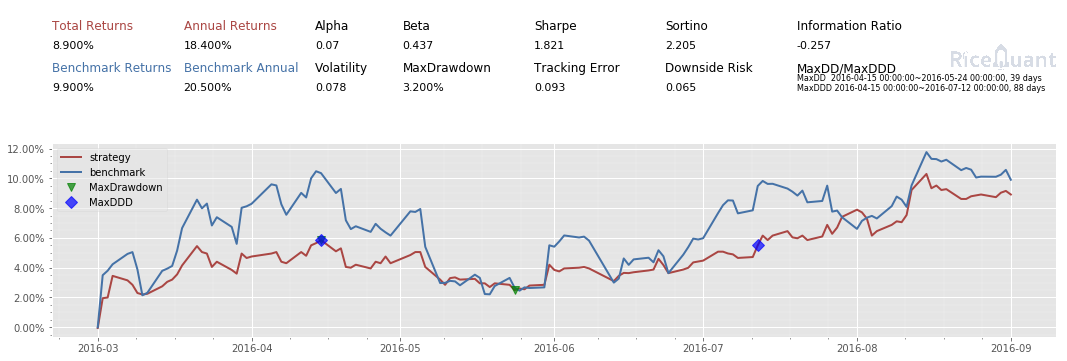

In [30]:
%%rqalpha -s 20160301 -e 20160901 --account stock 10000 -fq 1d -p -bm 000001.XSHG
# 上述命令参数可以通过运行 %%rqalpha_plus -h 查看到

def init(context):
    # 策略初始化运行
    logger.info('init')
    context.counter = 0

def before_trading(context):
    # 每日开盘前运行
    pass

def handle_bar(context, bar_dict):
    # 每个 bar 数据运行
    context.counter += 1
    if context.counter == 1:
        order_shares('000001.XSHE', 500)

def after_trading(context):
    # 每日收盘后运行
    pass

In [14]:
In []:report.keys()
Out []:dict_keys(['portfolio', 'benchmark_portfolio', 'trades', 'stock_positions', 'stock_account', 'summary'])

SyntaxError: invalid syntax (<ipython-input-14-dc465e2cfc3d>, line 1)

[2018-02-13 11:42:00.735971] WARN: system_log: Missing Chinese fonts. Fallback to English.


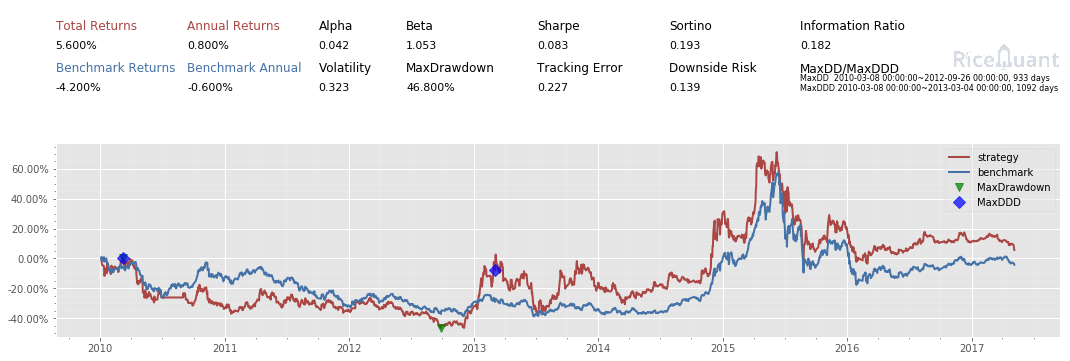

In [20]:
from rqalpha.api import *
#以上操作会导致当前数据获取API被覆盖，所以在运行完毕之后需要通过 from rqdatac import * 的方式恢复
from rqalpha import run_func

#config 中可设置选项可以通过 %%rqalpha_plus -h 查看到
config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


def init(context):
    context.s1 = "000001.XSHE"
    context.fired = False

def handle_bar(context, bar_dict):
    if not context.fired:
        # order_percent并且传入1代表买入该股票并且使其占有投资组合的100%
        order_percent(context.s1, 1)
        context.fired = True


results = run_func(init=init, config=config, handle_bar=handle_bar)
#如果您有自己的函数命名习惯，则可以通过以下指定函数名的方式运行回测
#results = run_func(init=init, handle_bar=handle_bar, before_trading=before_trading, after_trading=after_trading, config=config)
#下面的 import 将之前 from rqalpha_plus.api import * 的覆盖恢复
#from rqdatac import **

[2018-02-13 11:42:18.777997] WARN: system_log: Missing Chinese fonts. Fallback to English.


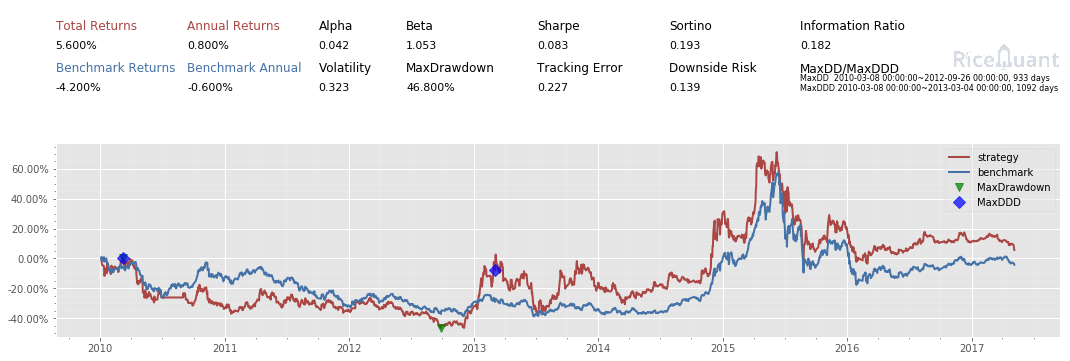

In [21]:
from rqalpha import run_code

config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}

code="""    

def init(context):
    context.s1 = "000001.XSHE"
    update_universe(context.s1)
    context.fired = False

def before_trading(context):
    pass

def handle_bar(context, bar_dict):
    if not context.fired:
        # order_percent并且传入1代表买入该股票并且使其占有投资组合的100%
        order_percent(context.s1, 1)
        context.fired = True
"""

results = run_code(code, config)

[2018-02-13 11:56:32.002473] WARN: system_log: Missing Chinese fonts. Fallback to English.


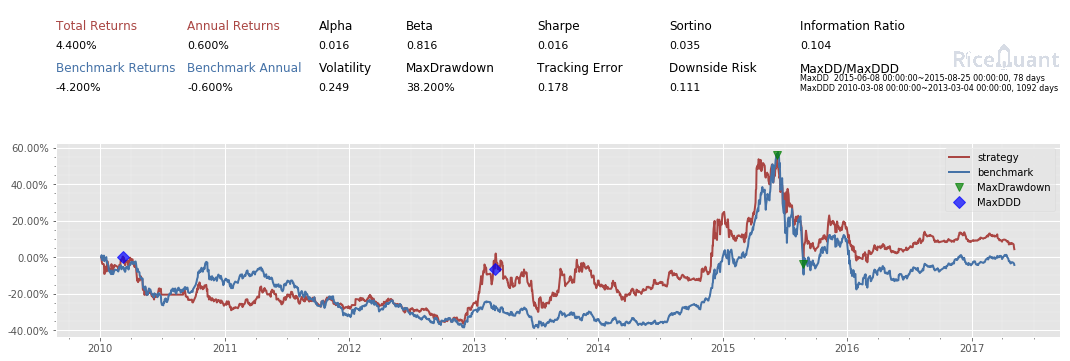

[2018-02-13 11:56:39.883701] WARN: system_log: Missing Chinese fonts. Fallback to English.


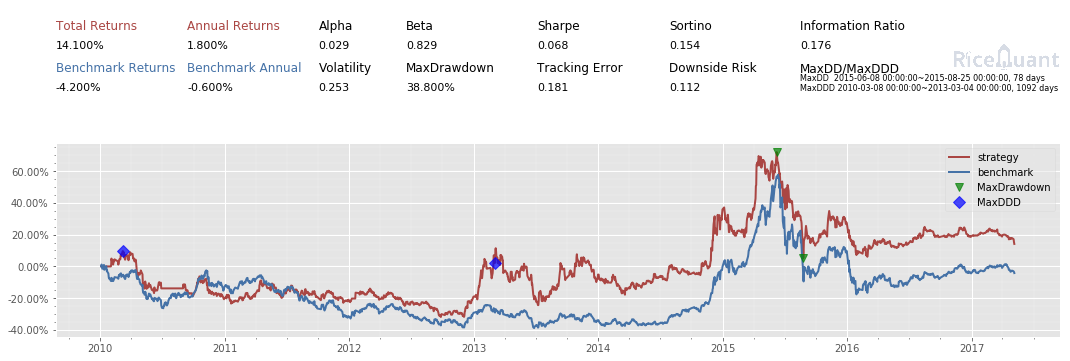

[2018-02-13 11:56:47.399866] WARN: system_log: Missing Chinese fonts. Fallback to English.


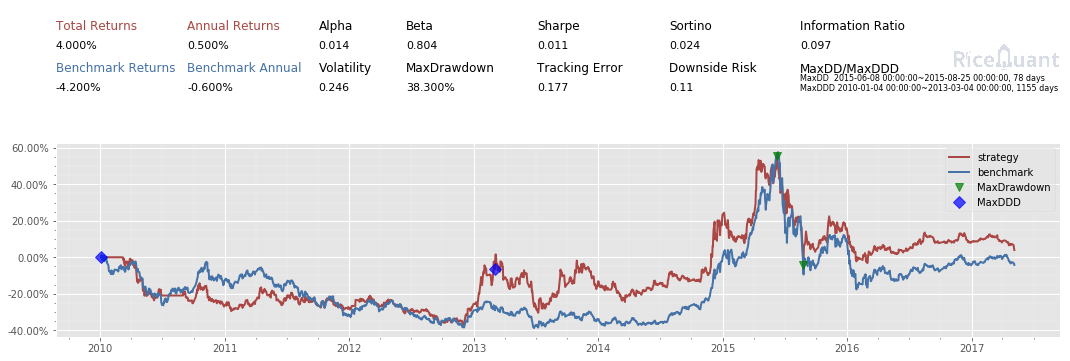

[2018-02-13 11:56:53.295028] WARN: system_log: Missing Chinese fonts. Fallback to English.


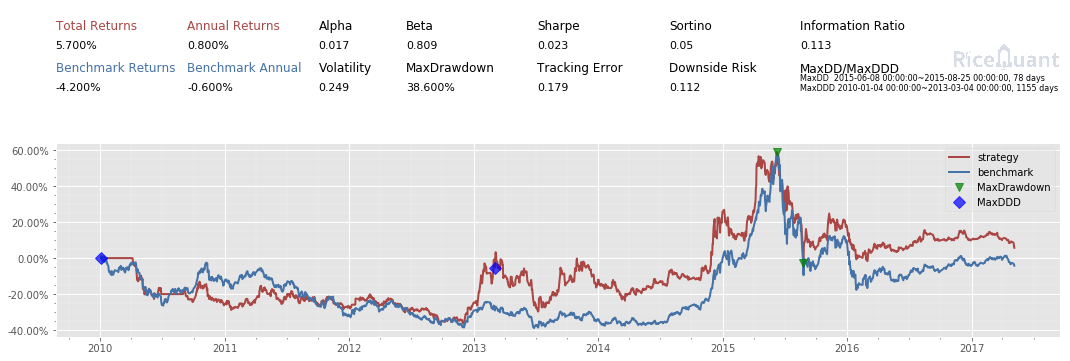

[2018-02-13 11:56:59.427222] WARN: system_log: Missing Chinese fonts. Fallback to English.


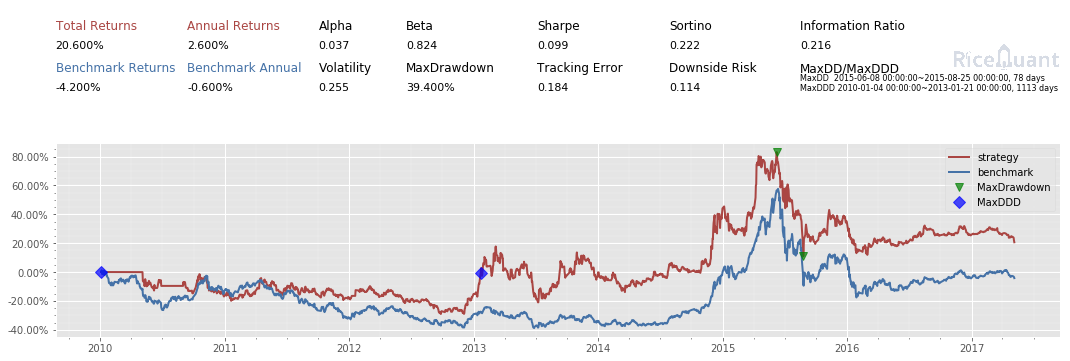

In [31]:

import os
from rqalpha import run_func
from rqalpha.api import *


config = {
  "base": {
    "start_date": "2010-01-01",
    "end_date": "2017-05-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


tasks = []
for signal in range(1, 101, 20):
    tasks.append((config, signal))

def run_bt(config, signal):
    def init(context):
        context.s1 = '000001.XSHE'
        context.counter = 0
        context.signal = signal

    def handle_bar(context, bar_dict):
        context.counter += 1
        if context.counter == context.signal:
            order_target_percent(context.s1, 0.8)

    result = run_func(config=config, init=init, handle_bar=handle_bar)
    return result, signal

results = []
for task in tasks:
    result = run_bt(*task)
    results.append({'signal': result[1],
                    'sharpe': result[0]['sys_analyser']['summary']['sharpe']}) 
#[2017-06-15 18:07:58.037054] INFO: system_log: rqdatac use socket ('peasant', 16003)
#/Applications/RQPro.app/Contents/rqalpha/lib/python3.5/site-packages/rqalpha/utils/risk.py:122: RuntimeWarning: invalid value encountered in double_scalars
#  self._beta = cov[0][1] / cov[1][1]